In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import itertools
from numpy.random import seed
from tensorflow import set_random_seed
from keras.models import Sequential
from sklearn.linear_model import LinearRegression
import math
from keras.layers import Dense, Dropout

/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

In [2]:
# loading / mergeing train and test /show head of data
path='/home/mjs/Downloads/titanic/train.csv'
path2='/home/mjs/Downloads/titanic/test.csv'
train=pd.read_csv(path,engine='python')
test=pd.read_csv(path2,engine='python')

df=pd.concat([train,test],axis=0)

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [3]:
# create new column named "Title" 
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand=True)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [4]:
# count   every name of Title   in all the data
df[df.Survived.notnull()].Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Capt          1
Lady          1
Mme           1
Jonkheer      1
Sir           1
Ms            1
Don           1
Name: Title, dtype: int64

In [5]:
# make few new calumn for predicting better
df['FamilySize']=df.Parch+df.SibSp+1
df['LargeFamily']=(df.FamilySize>=5).astype(int)
df['SmallFamily']=df.FamilySize.apply(lambda x: x<5 and x>1).astype(int)
df['Child']=(df.Age<=18).astype(int)


In [6]:
# make average age for every name in Title in train
train=df[df.Survived.notnull()]
age_mean = dict(train.groupby('Title')['Age'].mean())
age_mean

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [7]:
# make Sex columns by male =1 and female=0
df['Sex'] = df.Sex.apply(lambda x: 1 if x == 'male' else 0)
# df['Title']=df.Title

In [8]:
# count null point in data
df.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
FamilySize        0
LargeFamily       0
SmallFamily       0
Child             0
dtype: int64

In [9]:
# droping few columns 
df.drop(['Name', 'Cabin', 'Parch', 'SibSp', 'PassengerId', 'Ticket'], inplace=True, axis=1)
df.head()

,Age,Embarked,Fare,Pclass,Sex,Survived,Title,FamilySize,LargeFamily,SmallFamily,Child
0,22.0,S,7.2500,3,1,0.0,Mr,2,0,1,0
1,38.0,C,71.2833,1,0,1.0,Mrs,2,0,1,0
2,26.0,S,7.9250,3,0,1.0,Miss,1,0,0,0
3,35.0,S,53.1000,1,0,1.0,Mrs,2,0,1,0
4,35.0,S,8.0500,3,1,0.0,Mr,1,0,0,0


In [10]:
# make Embarkeds to new columns for prediction

# pd.get_dummies(df.Embarkeds)
df['EmbarkedsC']=df.Embarked.apply(lambda x: 1 if x=='C' else 0)
df['EmbarkedsS']=df.Embarked.apply(lambda x: 1 if x=='S' else 0)
df['EmbarkedsQ']=df.Embarked.apply(lambda x: 1 if x=='Q' else 0)
# df=df.drop(['Embarked'] ,axis=1)

In [11]:
# make train and test splited

X_train = df[df.Survived.notnull()].drop('Survived', axis=1)
y_train = df[df.Survived.notnull()].Survived
X_test = df[df.Survived.isnull()].drop('Survived', axis=1)

In [106]:
# make average of fare for every Embarked

Fmean=X_train.Fare.mean()

AEC=np.array(X_train['EmbarkedsC']).reshape((891,1))
EC=np.dot(AEC.T,np.array(X_train['Fare']))/(np.dot(AEC.T,np.array([1 for x in range(891)])))
             
AES=np.array(X_train['EmbarkedsS']).reshape((891,1))
ES=np.dot(AEC.T,np.array(X_train['Fare']))/(np.dot(AES.T,np.array([1 for x in range(891)])))
             
AEQ=np.array(X_train['EmbarkedsQ']).reshape((891,1))
EQ=np.dot(AEQ.T,np.array(X_train['Fare']))/(np.dot(AEQ.T,np.array([1 for x in range(891)])))


/home/mjs/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/mjs/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/mjs/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/mjs/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


[Text(0, 0, 'Major'),
 Text(0, 0, 'Miss'),
 Text(0, 0, 'Dr'),
 Text(0, 0, 'Lady'),
 Text(0, 0, 'Mrs'),
 Text(0, 0, 'Capt'),
 Text(0, 0, 'Mr'),
 Text(0, 0, 'Master'),
 Text(0, 0, 'Don'),
 Text(0, 0, 'Countess'),
 Text(0, 0, 'Ms'),
 Text(0, 0, 'Rev'),
 Text(0, 0, 'Dona'),
 Text(0, 0, 'Sir'),
 Text(0, 0, 'Jonkheer'),
 Text(0, 0, 'Mlle'),
 Text(0, 0, 'Mme'),
 Text(0, 0, 'Col')]

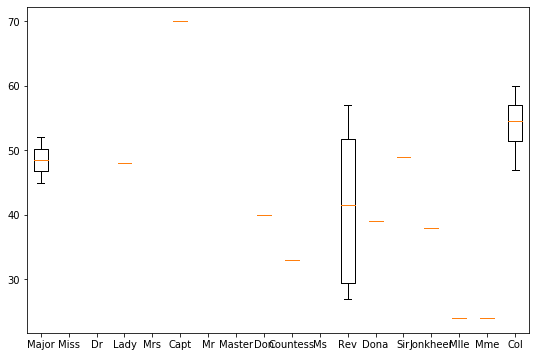

In [68]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)



c={}
Title=np.array(df['Title'])
age=np.array(df['Age'])
for i in set(df['Title']):
    t=[]
    for j in range(len(df['Title'])):
        if(Title[j]==i):
            t.append(age[j])

    c[i]=t
    
    
ax.boxplot([c[i] for i in set(df['Title'])])
ax.set_xticklabels(list(set(df['Title'])))

In [70]:
set(df['FamilySize'])

{1, 2, 3, 4, 5, 6, 7, 8, 11}

/home/mjs/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/mjs/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/mjs/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/mjs/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

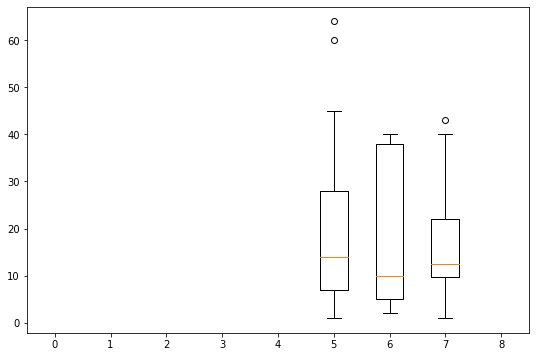

In [76]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)



c={}
FamilySize=np.array(df['FamilySize'])
age=np.array(df['Age'])
for i in set(df['FamilySize']):
    t=[]
    for j in range(len(df['FamilySize'])):
        if(FamilySize[j]==i):
            t.append(age[j])

    c[i]=t
    
    
ax.boxplot([c[i] for i in set(df['FamilySize'])])
# ax.set_xticklabels(list(set(df['FamilySize'])))
ax.set_xticklabels([i for i in range(12)])
# plt.xlabel([set(df['FamilySize'])])
# plt.show()

In [95]:
X_train.EmbarkedsC[3]

0

[Text(0, 0, 'EmbarkedsS'), Text(0, 0, 'EmbarkedsC'), Text(0, 0, 'Embarkedsq')]

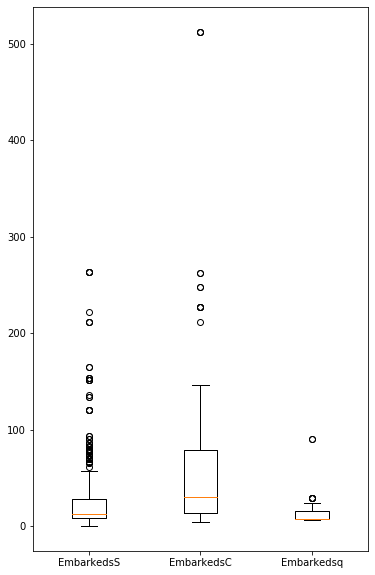

In [102]:
# prove of relation between Embarked and Fare
ES=[]
EC=[]
EQ=[]

for i in range(891):
#     print(i)
    if(X_train.EmbarkedsC[i]==1):
        EC.append(X_train.Fare[i])
    elif(X_train.EmbarkedsS[i]==1):
        ES.append(X_train.Fare[i])
    elif(X_train.EmbarkedsQ[i]==1):
        EQ.append(X_train.Fare[i])

        
fig=plt.figure(figsize=(6,10))
ax=fig.add_subplot(111)

ax.boxplot([list(ES),list(EC),list(EQ)])
ax.set_xticklabels(['EmbarkedsS','EmbarkedsC','Embarkedsq'])


In [103]:
# by Fare predict Embarked and y Title predict average Age for train

for i in range(891):
    if(pd.isna(X_train.Embarked[i])):
        m=float(X_train.Fare[i])
        a=np.array([EC[0]-m,EQ[0]-m,ES[0]-m],dtype='f')
        a=np.abs(a)
        b=np.sort(a)
        if(b[0]==a[0]):
            X_train.EmbarkedsC[i]=1
        if(b[0]==a[1]):
            X_train.EmbarkedsQ[i]=1
        if(b[0]==a[2]):
            X_train.EmbarkedsS[i]=1
    if(pd.isna(X_train.Age[i])):
        c=X_train.Title[i] 
        X_train.Age[i]=age_mean[c]
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [107]:
# byEmbarked predict avrage Fare and by Title predict average Age for test

for i in range(418):
    if(pd.isna(X_test.Fare[i])):
        if( X_test.EmbarkedsC[i]==1):
            X_test.Fare[i]=EC
        if( X_test.EmbarkedsS[i]==1):
            X_test.Fare[i]=ES
        if( X_test.EmbarkedsQ[i]==1):
            X_test.Fare[i]=EQ
    if(pd.isna(X_test.Age[i])):
        c=X_test.Title[i] 
        X_test.Age[i]=age_mean[c]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [108]:
# drop few columns
X_train=X_train.drop(['Fare','Embarked','Title'],axis=1)
X_test=X_test.drop(['Fare','Embarked','Title',],axis=1)

In [114]:
# linear regration for prediction
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
predict=reg.predict(X_test)

pre=np.array([0 for x in range(predict.size)])
for i in range(predict.size) :
       if(predict[i]>=0.5):
            pre[i]=1 
 # load test target   
path3='/home/mjs/Downloads/titanic/gender_submission.csv'
testlabel=pd.read_csv(path3,names=['PassengerId','Survived'])
testlabel=testlabel.drop([0],axis=0)
testlabel=testlabel.drop(['PassengerId'],axis='columns')


testlabel=pd.DataFrame(testlabel,columns=['Survived'])
B=np.asanyarray(testlabel.values.tolist())

c=np.array([0 for x in range(B.size)])
for i in range(B.size):
    c[i]=float(B[i])

In [118]:
def score(x,y):
    t=0
    for i in range(x.size):
        if(x[i]==y[i]):
            t+=1
    t/=x.size
    return t

In [119]:
# Score by regration

score(pre,c)

0.9712918660287081

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
tree=DecisionTreeRegressor()

In [150]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [151]:
pre=tree.predict(X_test)

In [153]:
pre=pre*2
pre=np.floor(pre)
for i in range(pre.size):
    if(pre[i]>=1):
        pre[i]=1
pre

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [154]:
score(pre,c)

0.7894736842105263